# Best Route

## A-Star Search Example

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
from typing import Dict, List, Tuple
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
# Add a cell to create and store the fixed layout
def create_fixed_layout(complete_graph: Dict[str, Dict[str, float]]) -> Dict[str, tuple]:
    """
    Create a fixed layout for all nodes combining distance and heuristic graphs.
    
    Args:
        combined_graph: Dictionary containing all nodes and their connections
        
    Returns:
        Dictionary mapping node names to (x, y) positions
    """
    # Create graph
    G = nx.Graph()
    
    # Add edges with weights
    for city1, neighbors in complete_graph.items():
        for city2, distance in neighbors.items():
            G.add_edge(city1, city2, weight=distance)
    
    # Add all nodes from the graph
    for node in complete_graph.keys():
        G.add_node(node)
    
    # Generate layout once
    return nx.spring_layout(G, k=1.5, iterations=50, seed=42)

In [53]:
def plot_graph(distances: Dict[str, Dict[str, float]], 
               path: List[str] = None,
               show_distances: bool = True,
               figsize: tuple = (12, 8),
               pos: Dict[str, tuple] = None):
    """
    Plot the graph with optional path highlighting.
    
    Args:
        distances: Dictionary of distances between nodes
        path: Optional list of nodes representing the route
        show_distances: Whether to show distance labels on edges
        figsize: Figure size as (width, height) tuple
        pos: Fixed positions for nodes
    """
    # Create graph
    G = nx.Graph()
    
    # Add edges with weights
    for city1, neighbors in distances.items():
        for city2, distance in neighbors.items():
            G.add_edge(city1, city2, weight=distance)
    
    # Set up the plot
    plt.figure(figsize=figsize)
    
    # Use provided positions or generate new ones
    if pos is None:
        pos = nx.spring_layout(G, k=1.5, iterations=50)
    
    # Draw edges first (background)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)
    
    # Draw edge labels if requested
    if show_distances:
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, 
                          node_color='lightblue',
                          node_size=700,
                          alpha=0.7)
    
    # Draw city labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    # If path is provided, highlight it
    if path and len(path) > 1:
        # Create edges pairs from path
        path_edges = list(zip(path[:-1], path[1:]))
        
        # Highlight the path edges
        nx.draw_networkx_edges(G, pos,
                             edgelist=path_edges,
                             edge_color='red',
                             width=2)
        
        # Highlight path nodes
        nx.draw_networkx_nodes(G, pos,
                             nodelist=path,
                             node_color='lightgreen',
                             node_size=700,
                             alpha=0.7)
    
    plt.title("Graph", pad=20, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [104]:
heuristic_graph = {
    'E1': {'E2': 4.3, 'E3': 9, 'E4': 14.7, 'E5': 17.2, 'E6': 13.1, 'E7': 11.8, 'E8': 11.3, 'E9': 8.2, 'E10': 10.7, 'E11': 8.4, 'E12': 14.1, 'E13': 18.5, 'E14': 17.3},
    'E2': {'E1': 4.3, 'E3': 5.3, 'E4': 10.3, 'E5': 13.1, 'E6': 12.7, 'E7': 10.3, 'E8': 6.9, 'E9': 4.3, 'E10': 7.4, 'E11': 5.9, 'E12': 11.3, 'E13': 14.8, 'E14': 12.9},
    'E3': {'E1': 9, 'E2': 5.3, 'E4': 5.9, 'E5': 8.5, 'E6': 10.9, 'E7': 7.7, 'E8': 4.1, 'E9': 6.5, 'E10': 8.9, 'E11': 9.4, 'E12': 14.5, 'E13': 13.9, 'E14': 10.3},
    'E4': {'E1': 14.7, 'E2': 10.3, 'E3': 5.9, 'E5': 2.9, 'E6': 15, 'E7': 12.7, 'E8': 4, 'E9': 9.1, 'E10': 9.7, 'E11': 12.2, 'E12': 14.7, 'E13': 10.6, 'E14': 6},
    'E5': {'E1': 17.2, 'E2': 13.1, 'E3': 8.5, 'E4': 2.9, 'E6': 16, 'E7': 12.3, 'E8': 7, 'E9': 12, 'E10': 15.3, 'E11': 14.8, 'E12': 17.3, 'E13': 12.7, 'E14': 6.9},
    'E6': {'E1': 13.1, 'E2': 12.7, 'E3': 10.9, 'E4': 15, 'E5': 16, 'E7': 3.2, 'E8': 15.1, 'E9': 16.5, 'E10': 18.5, 'E11': 19, 'E12': 24.3, 'E13': 25.2, 'E14': 21.1},
    'E7': {'E1': 11.8, 'E2': 10.3, 'E3': 7.7, 'E4': 12.7, 'E5': 12.3, 'E6': 3.2, 'E8': 12, 'E9': 13.3, 'E10': 16.4, 'E11': 16, 'E12': 22.2, 'E13': 22.6, 'E14': 17.1},
    'E8': {'E1': 11.3, 'E2': 6.9, 'E3': 4.1, 'E4': 4, 'E5': 7, 'E6': 15.1, 'E7': 12, 'E9': 5, 'E10': 5.6, 'E11': 7.9, 'E12': 12.4, 'E13': 9.8, 'E14': 6.4},
    'E9': {'E1': 8.2, 'E2': 4.3, 'E3': 6.5, 'E4': 9.1, 'E5': 12, 'E6': 16.5, 'E7': 13.3, 'E8': 5, 'E10': 3, 'E11': 3.4, 'E12': 8.1, 'E13': 10.9, 'E14': 9.6},
    'E10': {'E1': 10.7, 'E2': 7.4, 'E3': 8.9, 'E4': 9.7, 'E5': 15.3, 'E6': 18.5, 'E7': 16.4, 'E8': 5.6, 'E9': 3, 'E11': 3.4, 'E12': 5.6, 'E13': 7.7, 'E14': 8.4},
    'E11': {'E1': 8.4, 'E2': 5.9, 'E3': 9.4, 'E4': 12.2, 'E5': 14.8, 'E6': 19, 'E7': 16, 'E8': 7.9, 'E9': 3.4, 'E10': 3.4, 'E12': 5.9, 'E13': 11.2, 'E14': 12.7},
    'E12': {'E1': 14.1, 'E2': 11.3, 'E3': 14.5, 'E4': 14.7, 'E5': 17.3, 'E6': 24.3, 'E7': 22.2, 'E8': 12.4, 'E9': 8.1, 'E10': 5.6, 'E11': 5.9, 'E13': 8.6, 'E14': 12.3},
    'E13': {'E1': 18.5, 'E2': 14.8, 'E3': 13.9, 'E4': 10.6, 'E5': 12.7, 'E6': 25.2, 'E7': 22.6, 'E8': 9.8, 'E9': 10.9, 'E10': 7.7, 'E11': 11.2, 'E12': 8.6, 'E14': 6.1},
    'E14': {'E1': 17.3, 'E2': 12.9, 'E3': 10.3, 'E4': 6, 'E5': 6.9, 'E6': 21.1, 'E7': 17.1, 'E8': 6.4, 'E9': 9.6, 'E10': 8.4, 'E11': 12.7, 'E12': 12.3, 'E13': 6.1}
}

In [93]:
fixed_pos = create_fixed_layout(heuristic_graph)

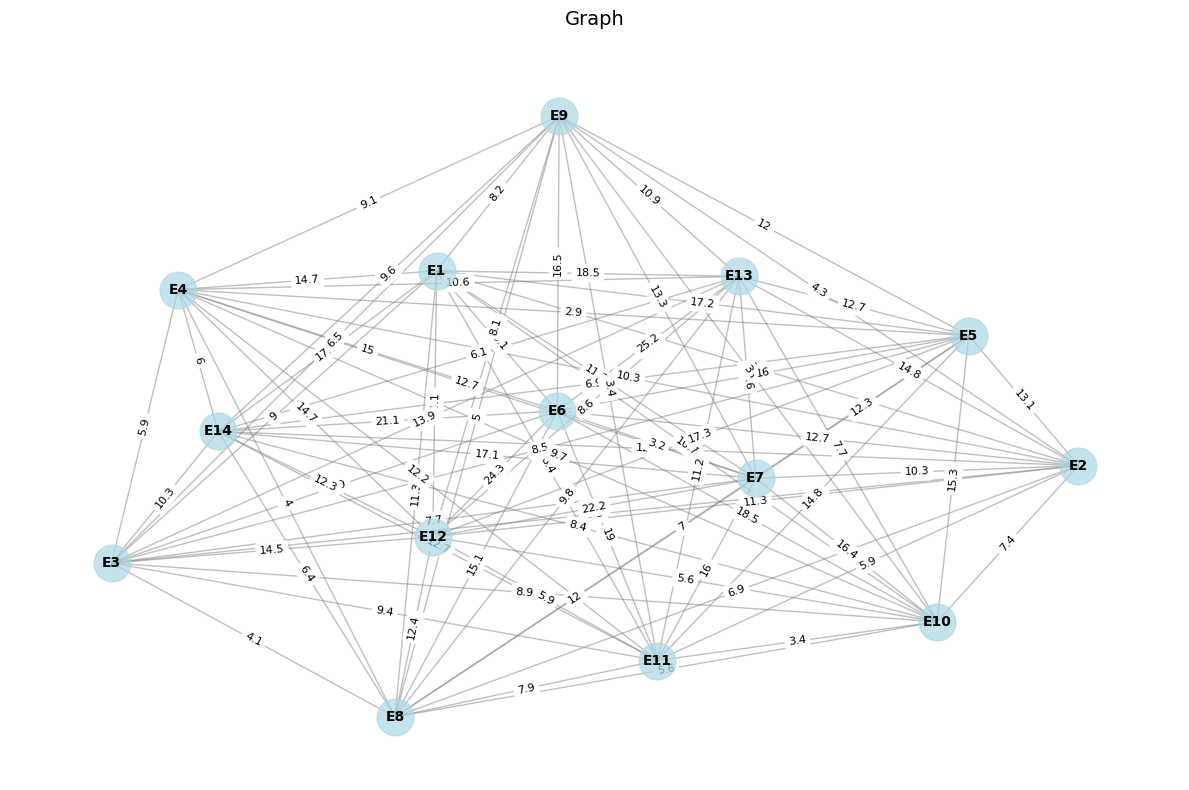

In [94]:
plot_graph(heuristic_graph, pos=fixed_pos)

In [ ]:
distance_graph = {
    'E1': {'E2': 4.3},
    'E2': {'E1': 4.3, 'E3': 5.3, 'E7': 14.3,  'E9': 4.3},
    'E3': {'E2': 5.3, 'E4': 5.9, 'E7': 8.5, 'E8': 4.1},
    'E4': {'E3': 5.9, 'E5': 2.9, 'E8': 4, 'E14': 6.2},
    'E5': {'E4': 2.9},
    'E6': {'E7': 3.2},
    'E7': {'E2': 14.3, 'E3': 8.5, 'E6': 3.2},
    'E8': {'E3': 4.1, 'E4': 4, 'E9': 5, 'E10': 6},
    'E9': {'E2': 4.3, 'E8': 5, 'E10': 3, 'E11': 3.4},
    'E10': {'E8': 6, 'E9': 3, 'E12': 5.6, 'E13': 9.1},
    'E11': {},
    'E12': {},
    'E13': {},
    'E14': {}
}

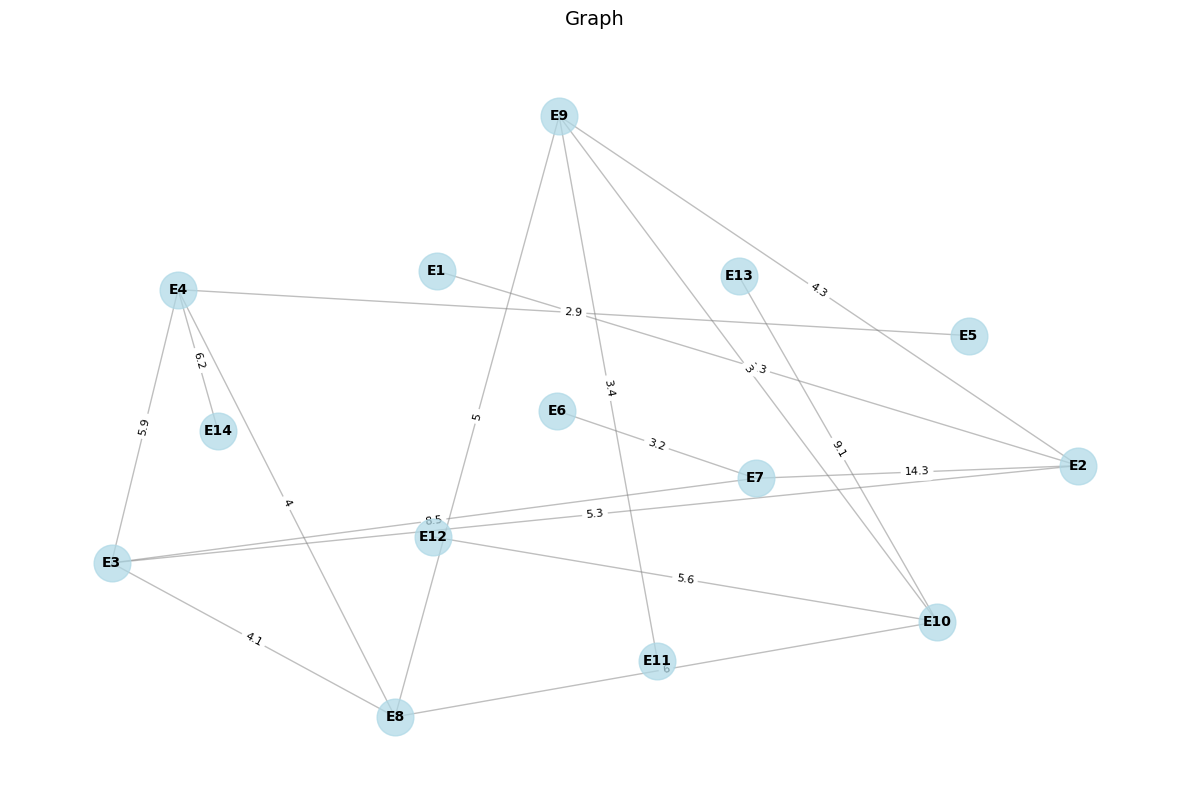

In [106]:
plot_graph(distance_graph, pos=fixed_pos)

In [107]:
from src.search import AStar
from src.search import SearchProblem

In [108]:
class RoutingProblem(SearchProblem):
    """Problem implementation for metro routing with line changes."""
    
    def __init__(self, distances: Dict[str, Dict[str, float]], 
                 heuristics: Dict[str, Dict[str, float]],
                 line_config: Dict[str, Dict[str, any]],
                 line_change_penalty: float = 3.0):
        self.distances = distances
        self.heuristics = heuristics
        self.line_config = line_config
        self.line_change_penalty = line_change_penalty
        self.current_line = None
        
        # Pre-compute station to lines mapping for faster lookup
        self.station_lines = {}
        for line_id, config in line_config.items():
            for station in config['stations']:
                if station not in self.station_lines:
                    self.station_lines[station] = []
                self.station_lines[station].append(line_id)

    
    def get_neighbors(self, state: str) -> List[str]:
        """
        Get all neighboring stations that can be reached directly.
        
        Args:
            state: Current station identifier
            
        Returns:
            List of neighboring station identifiers
        """
        if state not in self.distances:
            return []
        return list(self.distances[state].keys())
    
    def get_common_lines(self, station1: str, station2: str) -> List[str]:
        """Find common lines between two stations."""
        if station1 not in self.station_lines or station2 not in self.station_lines:
            return []
        lines1 = set(self.station_lines[station1])
        lines2 = set(self.station_lines[station2])
        return list(lines1 & lines2)
    
    def get_travel_time(self, distance: float, line_id: str) -> float:
        """Calculate travel time based on line speed."""
        speed = self.line_config[line_id]['speed']
        return distance / speed
    
    def get_cost(self, from_state: str, to_state: str) -> float:
        """
        Calculate total cost including:
        1. Travel time based on distance and line speed
        2. Line change penalty if needed
        """
        if to_state not in self.distances[from_state]:
            return float('inf')
            
        distance = self.distances[from_state][to_state]
        common_lines = self.get_common_lines(from_state, to_state)
        
        if not common_lines:
            return float('inf')  # Stations not connected by any line
            
        # Use the fastest common line
        best_time = float('inf')
        for line in common_lines:
            travel_time = self.get_travel_time(distance, line)
            best_time = min(best_time, travel_time)
            
        return best_time
    
    def heuristic(self, state: str, goal_state: str) -> float:
        """
        Estimate minimum travel time using:
        1. Straight-line distance from heuristic graph
        2. Maximum speed among all lines
        """
        if state not in self.heuristics or goal_state not in self.heuristics[state]:
            return 0.0
            
        distance = self.heuristics[state][goal_state]
        max_speed = max(config['speed'] for config in self.line_config.values())
        
        return distance / max_speed

    def get_path_details(self, path: List[str]) -> List[Dict]:
        """
        Get detailed journey information including line changes.
        """
        if not path or len(path) < 2:
            return []
            
        details = []
        current_line = None
        
        for i in range(len(path) - 1):
            from_station = path[i]
            to_station = path[i + 1]
            common_lines = self.get_common_lines(from_station, to_station)
            
            # Choose the best line (fastest)
            best_line = min(common_lines, 
                          key=lambda l: self.get_travel_time(
                              self.distances[from_station][to_station], l))
            
            details.append({
                'from': from_station,
                'to': to_station,
                'line': best_line,
                'distance': self.distances[from_station][to_station],
                'time': self.get_travel_time(
                    self.distances[from_station][to_station], 
                    best_line
                )
            })

        return details

In [109]:
line_config = {
    'R': { 'speed': 40.0, 'stations': ['E1', 'E2', 'E3', 'E4', 'E14']},
    'G': { 'speed': 40.0, 'stations': ['E2', 'E7', 'E9', 'E10', 'E13']},
    'B': { 'speed': 40.0, 'stations': ['E6', 'E7', 'E3', 'E8', 'E10', 'E12']},
    'Y': { 'speed': 40.0, 'stations': ['E11', 'E9', 'E8', 'E4', 'E5']},
}

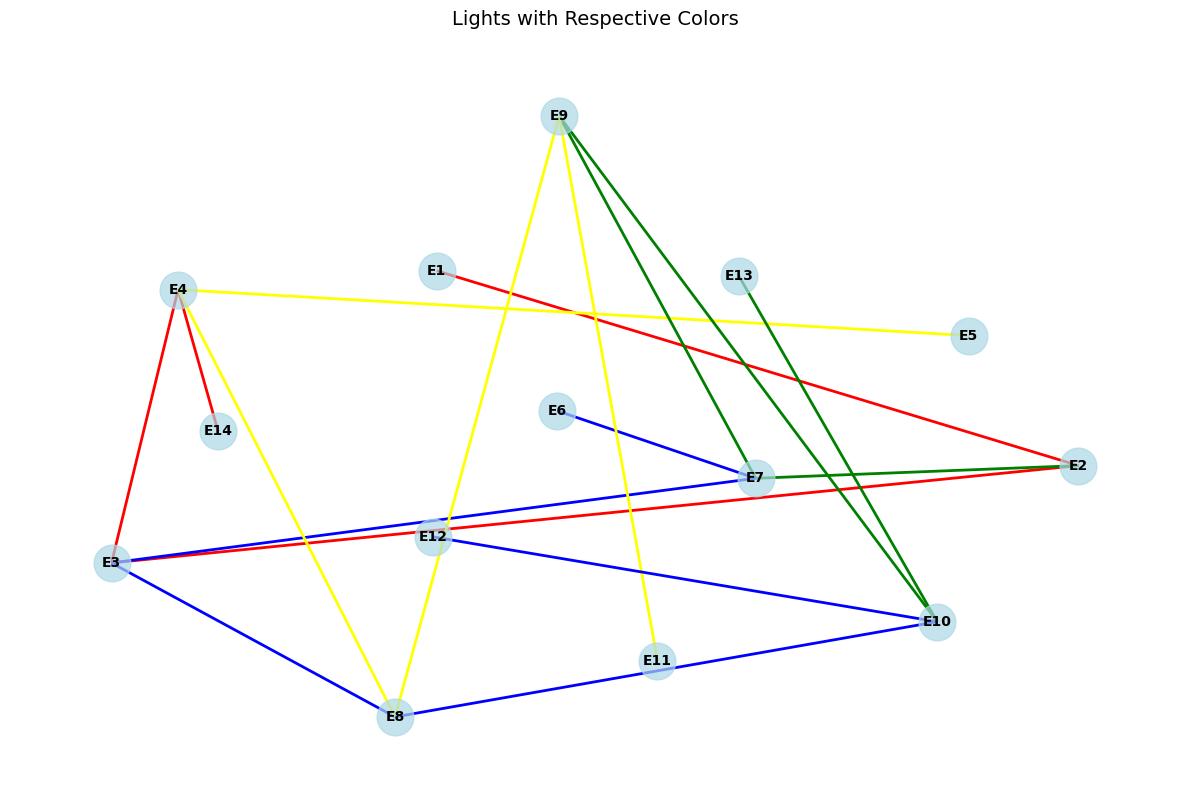

In [100]:
def plot_lights_with_colors(line_config: Dict[str, Dict[str, any]], pos: Dict[str, tuple]):
    """
    Plot the lights with their respective colors based on the line configuration.
    
    Args:
        line_config: Dictionary containing line configurations with colors
        pos: Fixed positions for nodes
    """
    # Map line IDs to colors
    line_colors = {'R': 'red', 'G': 'green', 'B': 'blue', 'Y': 'yellow'}
    
    # Create a graph
    G = nx.Graph()
    
    # Add nodes and edges based on line configuration
    for line_id, config in line_config.items():
        color = line_colors.get(line_id, 'black')  # Default to black if color not found
        stations = config['stations']
        for i in range(len(stations) - 1):
            G.add_edge(stations[i], stations[i + 1], color=color)
    
    # Set up the plot
    plt.figure(figsize=(12, 8))
    
    # Draw edges with respective colors
    for edge in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=edge[2]['color'], width=2)
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700, alpha=0.7)
    
    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    
    plt.title("Lights with Respective Colors", pad=20, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_lights_with_colors(line_config, fixed_pos)

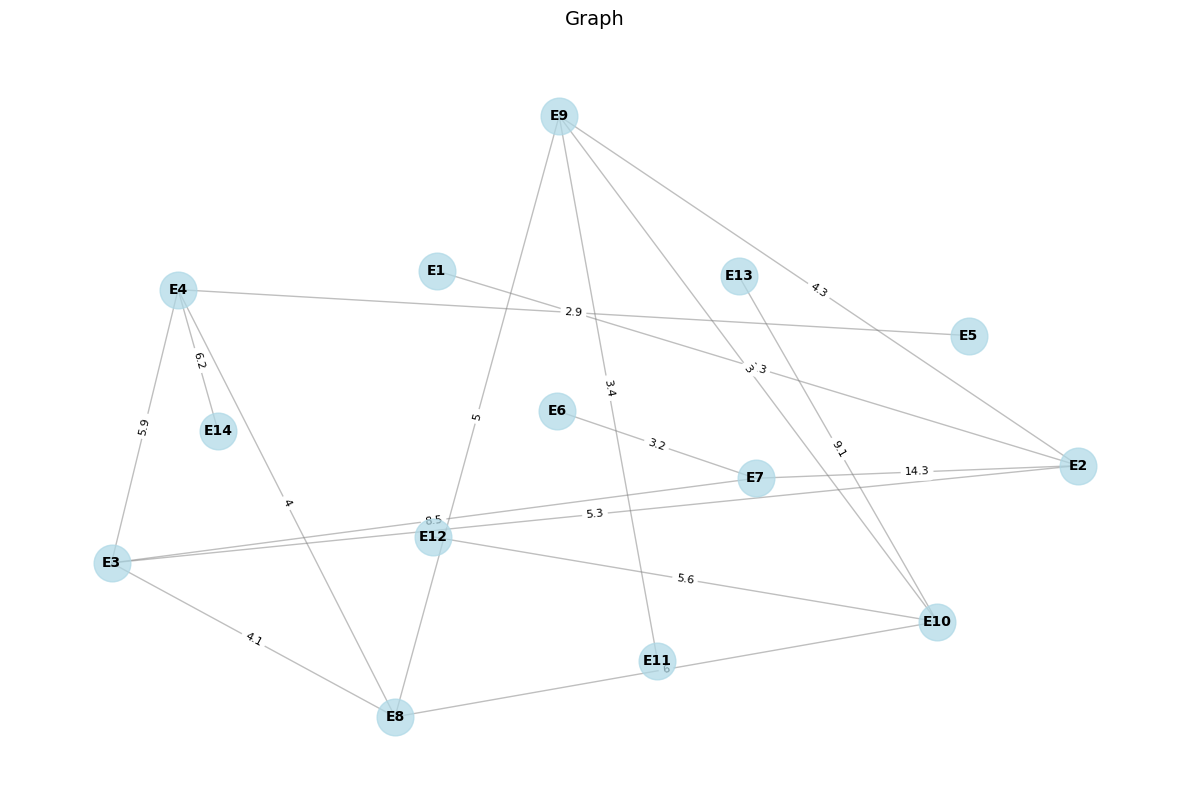

In [110]:
# Create routing problem with line configuration
routing = RoutingProblem(
    distances=distance_graph,
    heuristics=heuristic_graph,
    line_config=line_config,
    line_change_penalty=3.0
)

# Find path
pathfinder = AStar(problem=routing)
route = pathfinder.search(start='E14', goal='E4')

# Plot the route
plot_graph(distance_graph, path=route, pos=fixed_pos)

In [102]:
# Display detailed journey
if route:
    details = routing.get_path_details(route)
    print("Journey details:")
    current_line = None
    total_time = 0.0
    
    for step in details:
        if current_line and step['line'] != current_line:
            print(f"Change from line {current_line} to {step['line']}")
        
        print(f"{step['from']} -> {step['to']} : "
              f"Line {step['line']}, "
              f"Distance: {step['distance']:.1f}, "
              f"Time: {step['time']:.1f}")
        
        current_line = step['line']
        total_time += step['time']
    
    print(f"\nTotal time: {total_time:.1f}")